In [34]:
from itertools import izip

import numpy as np
from scipy.misc import comb
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = (10.0, 8.0)
rcParams['font.size'] = 20



# VC Inequality

## Formalism

The Vipnik-Chervonenkis Inequality (VC Inequality) is a theoretical fundation for Machine Learning. It is formally stated as follows  

\begin{equation}
\mathbf{P}\left[\left|E_{out}-E_{in}\right|>\epsilon \right] \le 4 m_\mathcal{H}(2N) \mathrm{exp}\left(-\frac{1}{8} \epsilon^2 N \right) \equiv \Omega(N, \mathcal{H}, \epsilon),
\end{equation}

where $E_{out}$ and $E_{in}$ are the out-of-sample error and in-sample error of the chosen hypothesis, respectively. $\epsilon$ is a given tolerance that measures how close the in-sample error agrees with the out-of-sample error. $m_\mathcal{H}$ is the growth function of the hypothesis set $\mathcal{H}$, which describes the ability of the hypothesis set to fit given N data points.

The VC Inequality tells us that the probability that $E_in$ does NOT track $E_out$ well is bounded by a function that is mainly exponentially decaying with the training data size $N$. However, it is compensated by a growing function respect to $N$. The good news is that when the hypothesis set's fitting ability is finite, i.e. it has a finite break point, its growth function will be bounded by a polynomial of N.  

Specifically, for a hypothesis set $\mathcal{H}$ with a VC dimension $d$, the growth function can be bounded as

\begin{equation} 
m_\mathcal{H}(N) \le \sum \limits_{i=0}^{d} C(N,i),
\end{equation}

where $C(N,i)$ is the combinatorial function "N choose i".

In this document, we want to quantitatively study the relationship between the tolerance $\epsilon$, the VC dimension $d$, the data set size $N$, and the VC bound $\Omega$.

> References

> /references/CaltechLFD/slides/slide05.pdf

> /references/CaltechLFD/slides/slide06.pdf

> /references/CaltechLFD/slides/slide07.pdf

## Evaluation of the VC bound

In [17]:
def m_H(N,d):
    """ Evaluate the growth function for VC dimension d, with N data points 
    
    N: int; number of data points
    d: int; VC dimension for the hypothesis set    
    """
    d_array = np.arange(d+1)  
    return np.sum(comb(np.zeros_like(d_array)+N, d_array, exact=False))

In [20]:
# we can apply m_H to a list of N and d, using map function
N_array = np.arange(10,20)
d = 4
d_array = d+np.zeros_like(N_array) 
map(lambda x:m_H(*x), zip(N_array, d_array))

[386.0, 562.0, 794.0, 1093.0, 1471.0, 1941.0, 2517.0, 3214.0, 4048.0, 5036.0]

In [24]:
def Omega(N, d, eps=0.1):
    """ Evaluate the exact VC bound for given data set size N, VC dimension d, and tolerance epsilon
    """
    return 4.0*m_H(N,d)*np.exp(-0.125*eps*eps*N)
    

In [23]:
Omega(20,2,0.1)

823.16156575191269

### Marginal N for a given epsilon, d and omega

In [56]:
N_array = np.power(2, np.arange(17))
d_list = range(1,8)
d_array_list = [d+np.zeros_like(N_array) for d in d_list]
epsilon=0.1
epsilon_array = epsilon+np.zeros_like(N_array, dtype=float)

omega_array_list = [map(lambda x: Omega(*x), zip(N_array, d_array, epsilon_array)) for d_array in d_array_list]

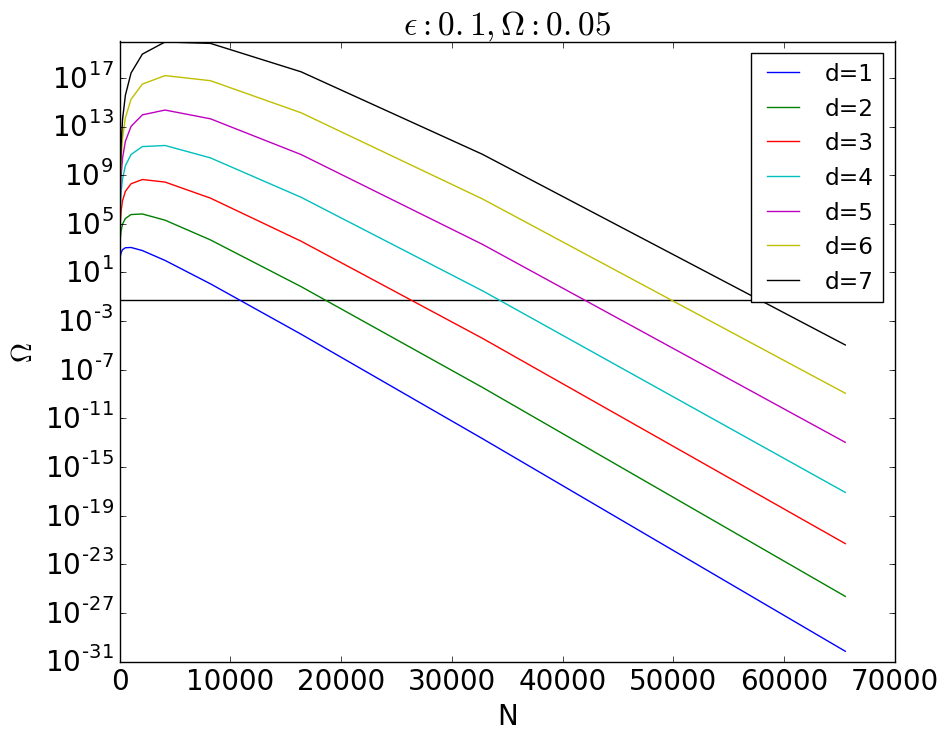

In [57]:
for d,omega_array in izip(d_list, omega_array_list):
    plt.semilogy(N_array, omega_array, label='d={}'.format(d))
omega = 0.05
plt.hlines(omega, xmin=1, xmax=2**16)
plt.legend(fontsize='small')
plt.title(r'$\epsilon:{0}, \Omega: {1}$'.format(epsilon, omega))
plt.xlabel('N')
plt.ylabel(r'$\Omega$')

In [50]:
N_array = np.power(2, np.arange(19))
d_list = range(1,8)
d_array_list = [d+np.zeros_like(N_array) for d in d_list]
epsilon=0.05
epsilon_array = epsilon+np.zeros_like(N_array, dtype=float)

omega_array_list = [map(lambda x: Omega(*x), zip(N_array, d_array, epsilon_array)) for d_array in d_array_list]

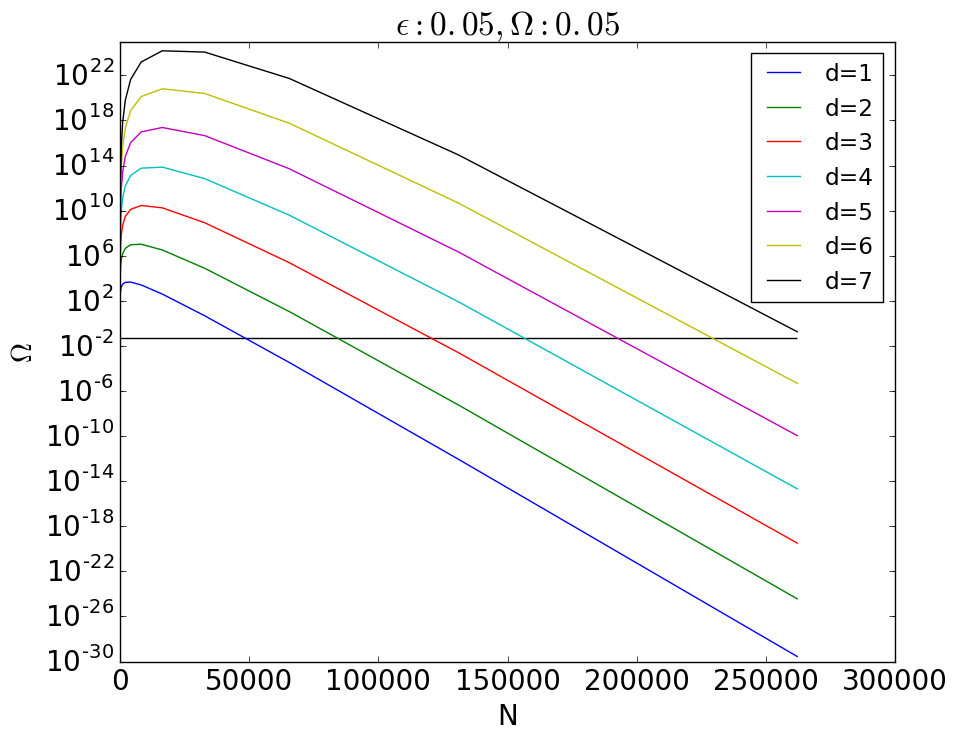

In [54]:
for d,omega_array in izip(d_list, omega_array_list):
    plt.semilogy(N_array, omega_array, label='d={}'.format(d))
omega = 0.05
plt.hlines(omega, xmin=1, xmax=2**18)
plt.legend(fontsize='small')
plt.title(r'$\epsilon:{0}, \Omega: {1}$'.format(epsilon, omega))
plt.xlabel('N')
plt.ylabel(r'$\Omega$')

> Remark

> It is clear that the raw VC bound is really loose. For $\epsilon=0.1$, $d=1$, and $Omega=0.05$, the corresponding N is roughly 10000. For $\epsilon=0.05$, the N becomes 50000. In order to have a reasonable generalizability (95% chance within 5% difference), the data required is enormous.

> Question:

> Why is N so large? How is the rule of thumb only $N \sim 10d$?